In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("train.csv")
type(data)

pandas.core.frame.DataFrame

In [3]:
data.shape # 1039 rows (observations) and 14 columns (variables, 13 input variables and 1 dependent variable)

(1039, 14)

In [4]:
data.head()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Number words female                   1039 non-null   int64  
 1   Total words                           1039 non-null   int64  
 2   Number of words lead                  1039 non-null   float64
 3   Difference in words lead and co-lead  1039 non-null   int64  
 4   Number of male actors                 1039 non-null   int64  
 5   Year                                  1039 non-null   int64  
 6   Number of female actors               1039 non-null   int64  
 7   Number words male                     1039 non-null   int64  
 8   Gross                                 1039 non-null   float64
 9   Mean Age Male                         1039 non-null   float64
 10  Mean Age Female                       1039 non-null   float64
 11  Age Lead         

Here we see that the training dataframe has no missing values. We also see the data type for each one of the features.
We have 3 different data types: dtypes: float64(6), int64(7), object(1). For object see --> <https://pbpython.com/currency-cleanup.html>

In [6]:
data.describe()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,2334.256015,11004.368624,4108.256978,2525.024062,7.767084,1999.862368,3.507218,4561.855630,111.149182,42.353766,35.929588,38.716073,35.486044
std,2157.216744,6817.397413,2981.251156,2498.747279,3.901439,10.406632,2.088526,3417.855987,151.761551,7.817110,8.957193,12.285902,12.046696
min,0.000000,1351.000000,318.000000,1.000000,1.000000,1939.000000,1.000000,0.000000,0.000000,19.000000,11.000000,11.000000,7.000000
25%,904.000000,6353.500000,2077.000000,814.500000,5.000000,1994.000000,2.000000,2139.500000,22.000000,37.480769,29.500000,30.000000,28.000000
50%,1711.000000,9147.000000,3297.000000,1834.000000,7.000000,2000.000000,3.000000,3824.000000,60.000000,42.600000,35.000000,38.000000,34.000000
75%,3030.500000,13966.500000,5227.000000,3364.000000,10.000000,2009.000000,5.000000,5887.500000,143.500000,47.333333,41.500000,46.000000,41.000000
max,17658.000000,67548.000000,28102.000000,25822.000000,29.000000,2015.000000,16.000000,31146.000000,1798.000000,71.000000,81.333333,81.000000,85.000000


In [7]:


np.set_printoptions(suppress=True, precision = 3)
a = data.describe()[7:8].to_numpy().reshape(-1, 1) # Notice that Lead variable does not appear
print(str(a).replace(' [', '').replace('[', '').replace(']', ''))

17658.   
67548.   
28102.   
25822.   
   29.   
 2015.   
   16.   
31146.   
 1798.   
   71.   
   81.333
   81.   
   85.   


In [8]:
data['Lead'].replace({'Male':1, 'Female':0}, inplace = True)
# When setting the argument inplace as True the DataFrame will be updated in place. 
# Otherwise, using inplace = False, which is the default value, would return a copy of the DataFrame.

In [9]:
data.info() # Now Lead is detected as an int dtype and it appears in the description (column Lead didn't appear in)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Number words female                   1039 non-null   int64  
 1   Total words                           1039 non-null   int64  
 2   Number of words lead                  1039 non-null   float64
 3   Difference in words lead and co-lead  1039 non-null   int64  
 4   Number of male actors                 1039 non-null   int64  
 5   Year                                  1039 non-null   int64  
 6   Number of female actors               1039 non-null   int64  
 7   Number words male                     1039 non-null   int64  
 8   Gross                                 1039 non-null   float64
 9   Mean Age Male                         1039 non-null   float64
 10  Mean Age Female                       1039 non-null   float64
 11  Age Lead         

In [10]:
data.describe()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,2334.256015,11004.368624,4108.256978,2525.024062,7.767084,1999.862368,3.507218,4561.855630,111.149182,42.353766,35.929588,38.716073,35.486044,0.755534
std,2157.216744,6817.397413,2981.251156,2498.747279,3.901439,10.406632,2.088526,3417.855987,151.761551,7.817110,8.957193,12.285902,12.046696,0.429977
min,0.000000,1351.000000,318.000000,1.000000,1.000000,1939.000000,1.000000,0.000000,0.000000,19.000000,11.000000,11.000000,7.000000,0.000000
25%,904.000000,6353.500000,2077.000000,814.500000,5.000000,1994.000000,2.000000,2139.500000,22.000000,37.480769,29.500000,30.000000,28.000000,1.000000
50%,1711.000000,9147.000000,3297.000000,1834.000000,7.000000,2000.000000,3.000000,3824.000000,60.000000,42.600000,35.000000,38.000000,34.000000,1.000000
75%,3030.500000,13966.500000,5227.000000,3364.000000,10.000000,2009.000000,5.000000,5887.500000,143.500000,47.333333,41.500000,46.000000,41.000000,1.000000
max,17658.000000,67548.000000,28102.000000,25822.000000,29.000000,2015.000000,16.000000,31146.000000,1798.000000,71.000000,81.333333,81.000000,85.000000,1.000000


# Do men or women dominate speaking roles in Hollywood movies?

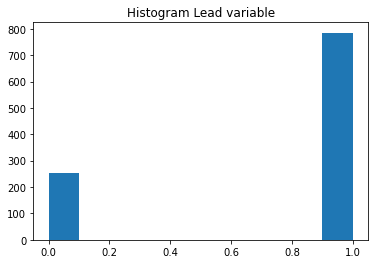

In [11]:
Lead = data['Lead']
plt.title('Histogram Lead variable')
_ = plt.hist(Lead)

In [12]:
np.mean(Lead) # Same value that we can observe in the previous descriptive table

0.7555341674687199

In [13]:
Lead.value_counts()

1    785
0    254
Name: Lead, dtype: int64

# Has the 'Lead' ratio between male and female changed over years?

In [14]:
df = data.drop(data[data.Lead == 0].index)

In [15]:
df.shape

(785, 14)

In [16]:
n = data.Year.unique()
n

array([1995, 2001, 1968, 2002, 1988, 1997, 1980, 1973, 1977, 1999, 1990,
       1984, 1992, 2000, 1989, 1996, 1994, 2003, 2006, 1993, 2010, 1985,
       2008, 2004, 2005, 2007, 1981, 1991, 1986, 2009, 1998, 1982, 1978,
       1987, 1960, 1975, 2013, 1983, 1939, 2011, 1979, 2012, 2014, 1972,
       1954, 1958, 1974, 1976, 1959, 2015, 1949], dtype=int64)

In [17]:
df2 = data.drop(data[data.Lead == 1].index)
n2 = df2.Year.unique()
n2

array([1995, 1999, 1989, 1992, 2008, 2004, 1997, 1990, 2007, 2000, 2003,
       1996, 1991, 1984, 2009, 2002, 1986, 2006, 2001, 1993, 2005, 1939,
       1994, 1981, 2010, 2011, 1998, 2013, 2012, 2014, 1982, 1987, 1983,
       1958, 1988, 1980, 1973, 1977, 2015, 1959], dtype=int64)

In [18]:
x = data['Year'].value_counts() # Number of Lead Male and Female grouped by year
y = df['Year'].value_counts() # Number of Lead Male by year
ratio = y/x # Gender ratio across the years

In [19]:
sum(x) # The sum all of the counts is equal to the length of the dataset, which makes sense.

1039

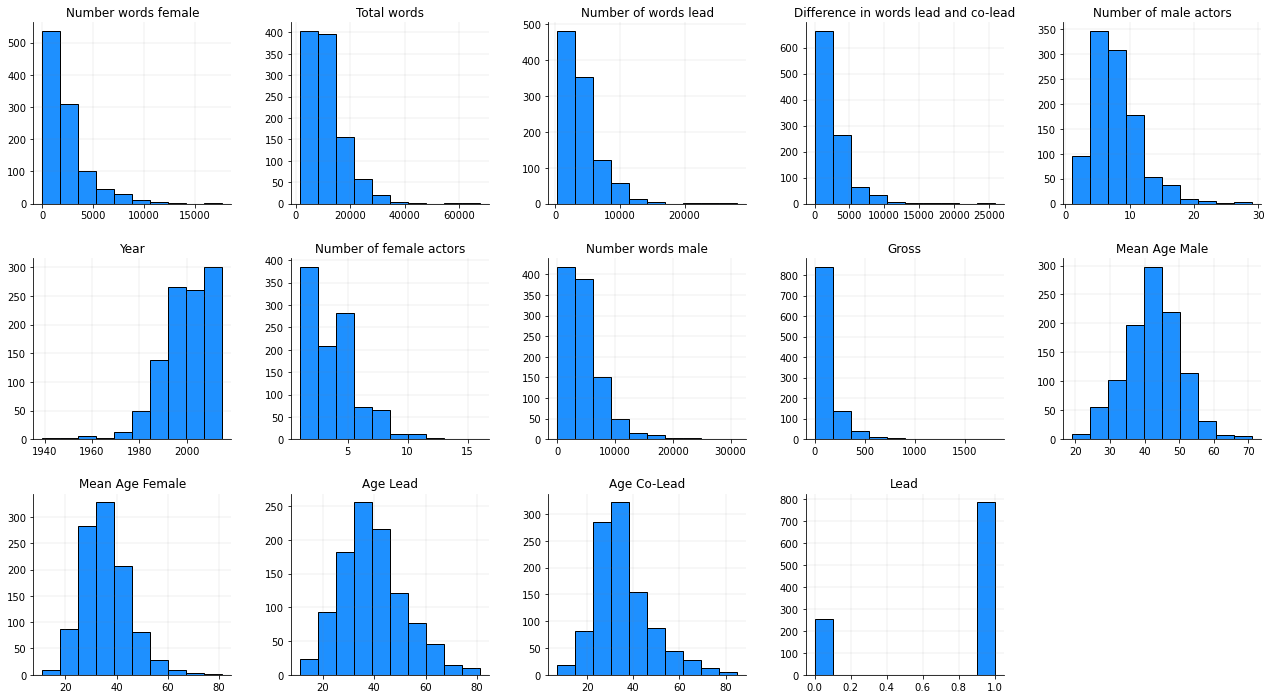

In [21]:
axes = data.hist(layout = (3,5), figsize = (22, 12), alpha = 1, color = "dodgerblue", edgecolor = "black", linewidth = 1)

axes = axes.flatten().tolist()

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color = 'grey', linestyle='-', linewidth = 0.25, alpha = 0.5)

    
plt.savefig("histograms.svg", format = "svg", dpi=300, transparent = True, bbox_inches = 'tight')
plt.show() 

In [ ]:
data.columns


In [ ]:
df1 = data.drop(columns = ['Number words male', 'Gross',
       'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead', 'Lead'])
df2 = data.drop(columns = ['Number words female', 'Total words', 'Number of words lead',
       'Difference in words lead and co-lead', 'Number of male actors', 'Year',
       'Number of female actors'])

In [ ]:
df1 = data.drop(columns = ['Number words male', 'Gross',
       'Mean Age Male', 'Mean Age Female', 'Age Lead', 'Age Co-Lead', 'Lead'])
df2 = data.drop(columns = ['Number words female', 'Total words', 'Number of words lead',
       'Difference in words lead and co-lead', 'Number of male actors', 'Year',
       'Number of female actors'])

red_circle = dict(markerfacecolor = "dodgerblue", marker = 'o', markeredgecolor = 'dodgerblue')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')

fig1, axs = plt.subplots(1, len(df1.columns), figsize = (50,10))


for i, ax in enumerate(axs.flat):
    ax.boxplot(df1.iloc[:,i], flierprops=red_circle, widths=0.5,  medianprops=medianprops)
    if (i==3):
        ax.set_title('Diff. words lead / co-lead', fontsize=30)
    else:
        ax.set_title(data.columns[i], fontsize=30)
    ax.tick_params(axis='y', labelsize = 14)


fig2, axs = plt.subplots(1, len(df2.columns), figsize = (50,10))



for i, ax in enumerate(axs.flat):
    ax.boxplot(df2.iloc[:,i], flierprops=red_circle, widths= 0.5, medianprops=medianprops)
    ax.set_title(df2.columns[i], fontsize=30)
    ax.tick_params(axis='y', labelsize = 14)

fig1.savefig("boxplots1.svg", format = "svg", dpi=300, transparent = True, bbox_inches = 'tight')
fig2.savefig("boxplots2.svg", format = "svg", dpi=300, transparent = True, bbox_inches = 'tight')

In [ ]:
fig, ax = plt.subplots(figsize=(17, 5))

ax.set_yticks([0.2,0.4,0.5,0.6,0.8,1.0])
plt.gca().get_yticklabels()[2].set_color("red")


ax.bar(n, ratio, color="dodgerblue",
        edgecolor = "black", linewidth = 1)
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
#adds a title and axes labels
ax.set_xlabel('Year',  fontsize=16)
ax.set_ylabel('% male leading movies',  fontsize=16)

#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
#adds major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.savefig("years.svg", format = "svg", dpi=300, transparent = True, bbox_inches = 'tight')

 # Identify outliers via boxplots

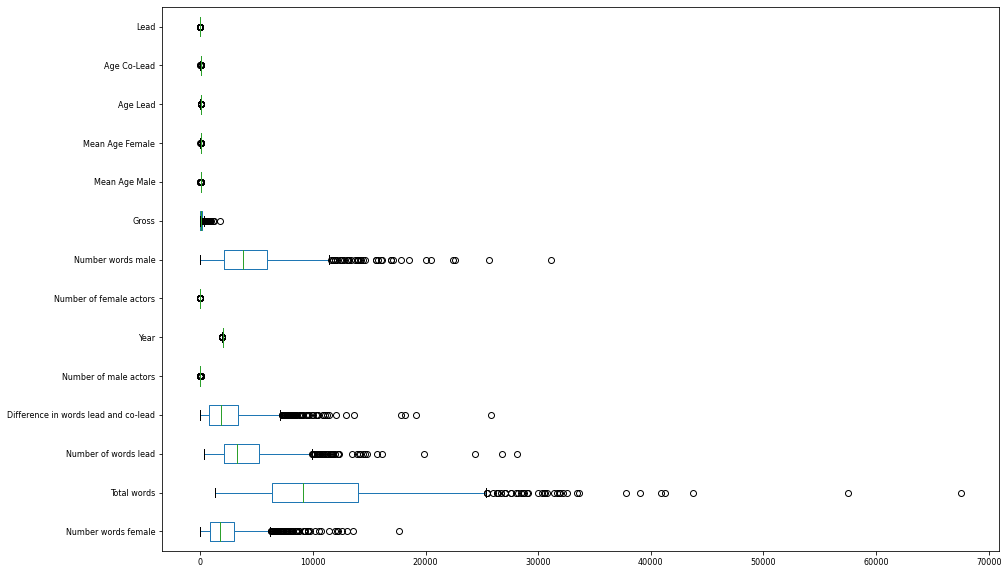

In [22]:
# boxplot = data.boxplot(figsize = (15,10), rot = 0, fontsize= '8', grid = False, vert=False) # All boxplots together

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# variables = data.select_dtypes(exclude=['object'])

# for column in variables:
#         plt.figure(figsize=(15,3))
#         sns.boxplot(data=data, x=column)

# Do films in which men do more speaking make a lot more money than films in which women speak more?

In [23]:
male = data.drop(data[data.Lead == 0].index) # Drop female values
female = data.drop(data[data.Lead == 1].index) # Drop male values

In [30]:
np.mean(male['Gross']), np.mean(female['Gross'])

(115.16305732484076, 98.74409448818898)

In [26]:
x1 = male.groupby(by='Year').agg('mean')['Gross']
x2 = female.groupby(by='Year').agg('mean')['Gross']
len(x2) # For some years there is no female Leading, we have to fill those years with 0's

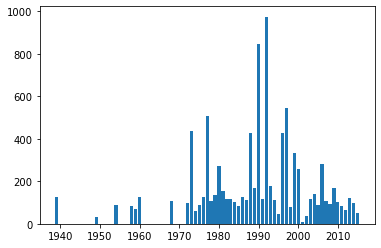

In [28]:
# Male gross salary evolution by year
plt.bar(n,x1)
plt.rcParams["figure.figsize"] = (16,4)

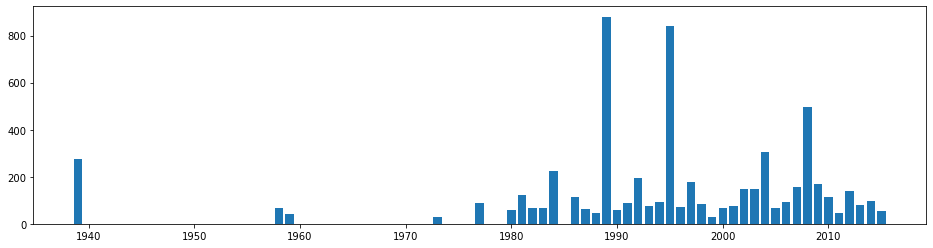

In [29]:
# Female gross salary evolution by year
female_years = female.Year.unique() # Years where we have female observations
plt.bar(female_years,x2)
plt.rcParams["figure.figsize"] = (16,4)

# Automatic profile report with pandas

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data, title='Dataset Profiling Report', infer_dtypes=False)
profile.to_notebook_iframe()
# profile.to_file("report.html")

## Comments

- Bivariant analysis (plot all the input variables against the 'Lead' variable).
- How do we treat the outliers? Which values do we consider outliers? See boxplots.
- Set al variables to int.
- How do we treat correlation between variables? --> feature selection?